# Comparing Custom KMeans vs Sklearn KMeans

In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
from sklearn.datasets import load_digits, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from ml_lib import KMeans as KMeansFromTemu
from utils.helpers import train_time, plot_silhouette_chart, evaluate_metrics, visualize_clustering
import matplotlib.pyplot as plt
import numpy as np

## 1. Dataset Generation

In [3]:
X_blobs, y_blobs = make_blobs(n_samples=300, centers=4, cluster_std=1.5, random_state=42)
X_digits, y_digits = load_digits(return_X_y=True)

ckmeans = KMeansFromTemu(n_clusters=4) 
kmeans = KMeans(n_clusters=4)

## 2. Model Training

In [4]:
y_pred_ckmeans = ckmeans.fit_predict(X_blobs)
y_pred_kmeans = kmeans.fit_predict(X_blobs)

train_time(KMeansFromTemu(n_clusters=4), X_blobs, y_blobs, supervised=False)
train_time(KMeans(n_clusters=4), X_blobs, y_blobs, supervised=False)

Model trained in 0.0000 seconds.
Model trained in 0.0014 seconds.


0.0014

## 3. Predictions & Evaluation

### 3.1 Inertia, silhouette, and adjusted-rand scores

In [5]:
inertia_ckmeans = ckmeans._inertia
inertia_kmeans = kmeans.inertia_

print("Custom KMeans Inertia:", inertia_ckmeans)
print("Sklearn KMeans Inertia:", inertia_kmeans)

Custom KMeans Inertia: 1251.352629870747
Sklearn KMeans Inertia: 1251.3526298707468


In [6]:
display(evaluate_metrics(X=X_blobs, y_true=y_blobs, y_pred=y_pred_ckmeans, supervised=False, title="Custom KMeans Evaluation"))
display(evaluate_metrics(X=X_blobs, y_true=y_blobs, y_pred=y_pred_kmeans, supervised=False, title="Sklearn KMeans Evaluation"))

,Model,Silouhette,Adjusted-Rand
0,Custom KMeans Evaluation,0.691248,0.991081


,Model,Silouhette,Adjusted-Rand
0,Sklearn KMeans Evaluation,0.691248,0.991081


### 3.2 Silhouette Score Chart

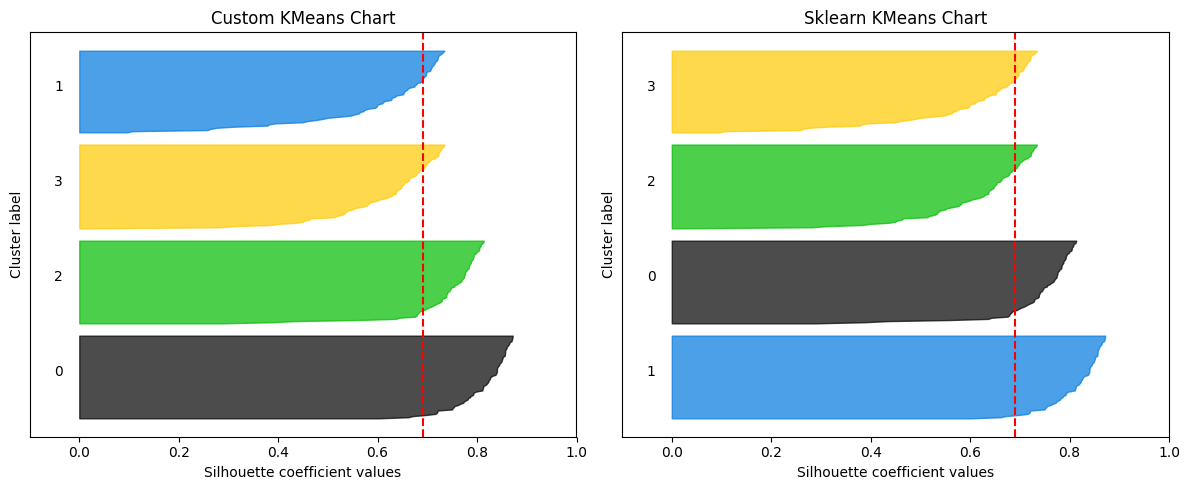

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

plot_silhouette_chart(X_blobs, y_pred_ckmeans, ax1, n_clusters=4, title="Custom KMeans Chart")
plot_silhouette_chart(X_blobs, y_pred_kmeans, ax2, n_clusters=4, title="Sklearn KMeans Chart")

plt.tight_layout()
plt.show()

### 3.3 Visualized Clustering

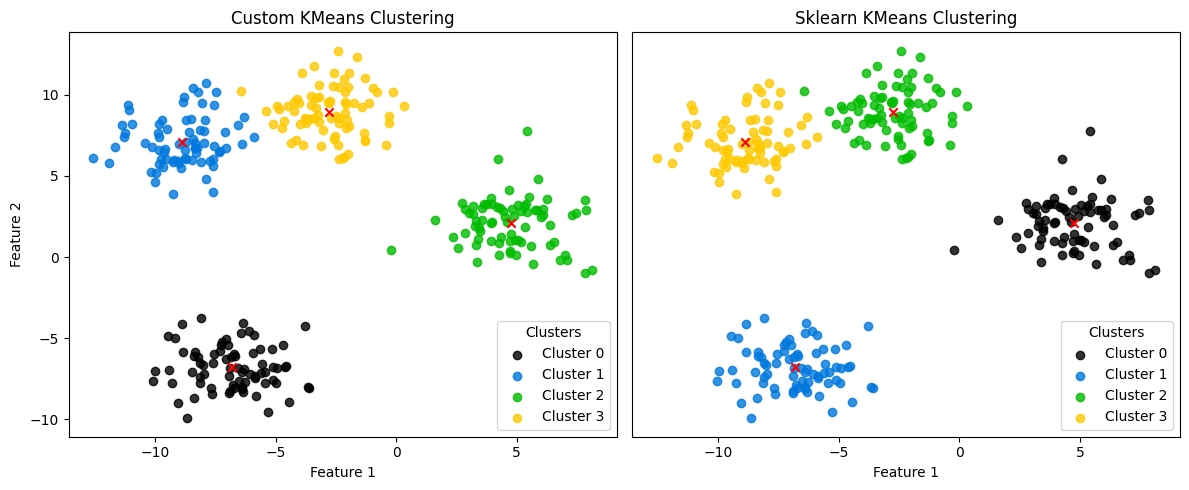

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

centroids_ckmeans = ckmeans._centroids
centroids_kmeans = kmeans.cluster_centers_

visualize_clustering(X=X_blobs, y=y_pred_ckmeans, ax=ax1, centroids=centroids_ckmeans, title="Custom KMeans Clustering")
visualize_clustering(X=X_blobs, y=y_pred_kmeans, ax=ax2, centroids=centroids_kmeans, title="Sklearn KMeans Clustering", yvisible=False)

plt.tight_layout()
plt.show()

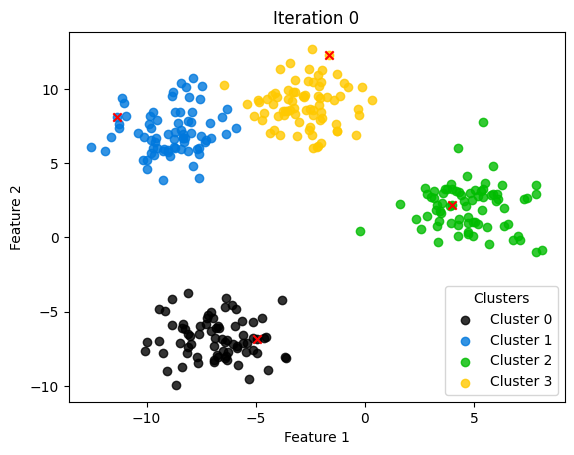

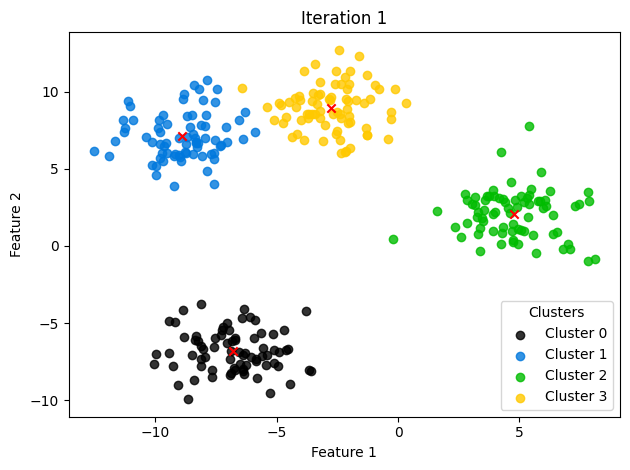

In [9]:
i = 0

for i, centroid in enumerate(ckmeans._centroids_over_iters):
    visualize_clustering(X_blobs, ckmeans._labels_over_iters[i], centroid, title=f"Iteration {i}")
    i += 1

plt.tight_layout()
plt.show()

In [10]:
ckmeans = KMeansFromTemu(n_clusters=10)
kmeans = KMeans(n_clusters=10)

y_pred_ckmeans = ckmeans.fit_predict(X_digits)
y_pred_kmeans = kmeans.fit_predict(X_digits)

print("Adjusted-Rand Score Between Both Predictions:", adjusted_rand_score(y_pred_kmeans, y_pred_ckmeans))
print("")
print("Adjusted-Rand Score Between True Labels and Custom Predictions:", adjusted_rand_score(y_digits, y_pred_ckmeans))
print("")
print("Adjusted-Rand Score Between True Labels and Sklearn Predictions:", adjusted_rand_score(y_digits, y_pred_kmeans))
print("")
print("Silhouette Score for Custom Predictions:", silhouette_score(X_digits, y_pred_ckmeans))
print("")
print("Silhouette Score for Sklearn Predictions:", silhouette_score(X_digits, y_pred_kmeans))

Adjusted-Rand Score Between Both Predictions: 0.7748774702751555

Adjusted-Rand Score Between True Labels and Custom Predictions: 0.6207219476296286

Adjusted-Rand Score Between True Labels and Sklearn Predictions: 0.5780034856595966

Silhouette Score for Custom Predictions: 0.18246486096993372

Silhouette Score for Sklearn Predictions: 0.17723886744922604


## 4. Classifying Digits 

In [11]:
ckmeans = KMeansFromTemu(n_clusters=30)

distances = ckmeans.fit_transform(X_digits)
representative_digits_indices = np.argmin(distances, axis=0)
X_representative = X_digits[representative_digits_indices]

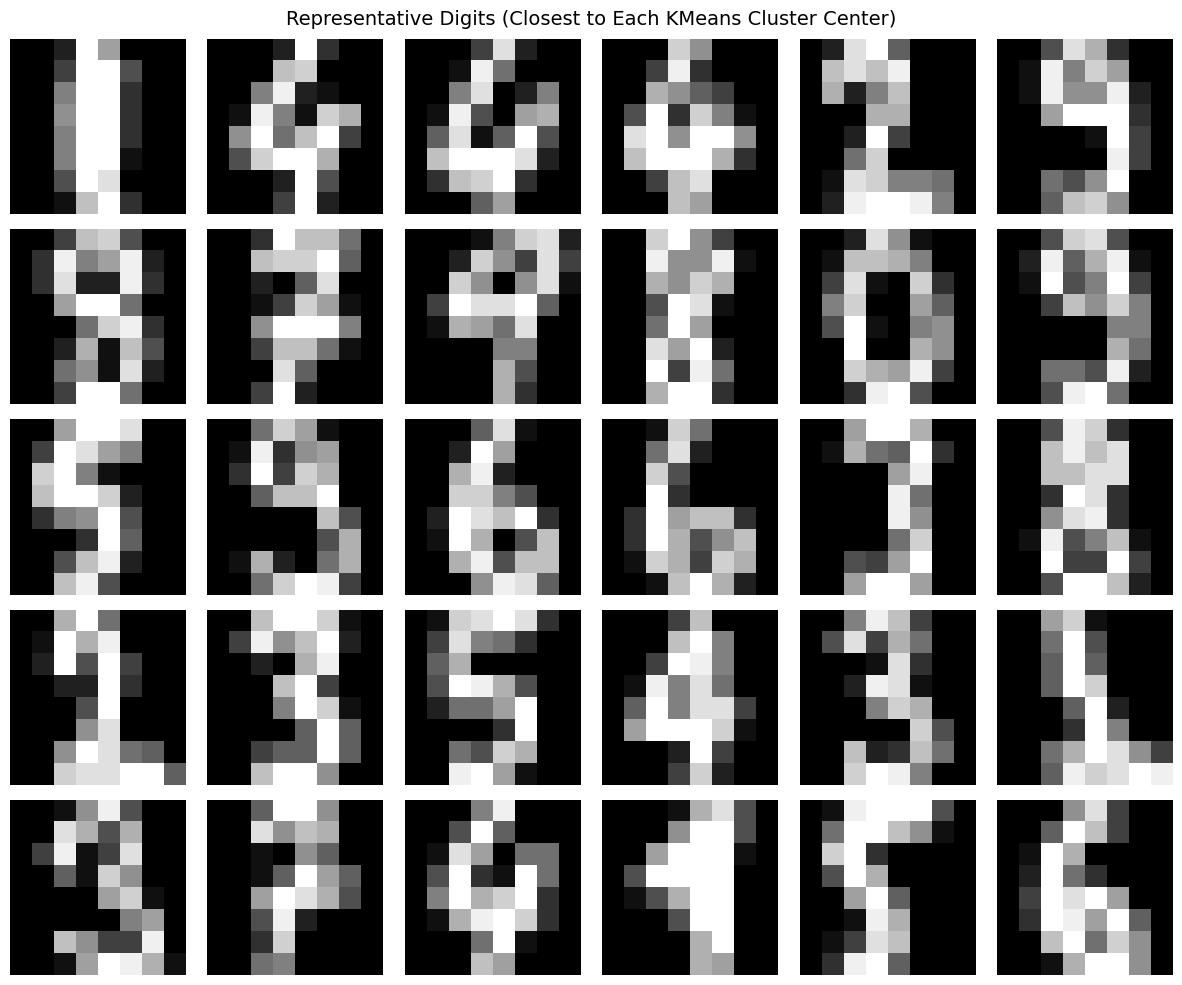

In [12]:
fig, axes = plt.subplots(5, 6, figsize=(12,10))

for img, ax in zip(X_representative, axes.flat):
    ax.imshow(img.reshape(8,8), cmap="gray")
    ax.axis("off")

plt.suptitle("Representative Digits (Closest to Each KMeans Cluster Center)", fontsize=14)
plt.tight_layout()
plt.show()

In [35]:
labels = np.array([1, 4, 4, 4, 2, 9,
                   8, 7, 4, 8, 0, 9,
                   5, 9, 6, 6, 3, 8,
                   2, 3, 5, 4, 3, 1,
                   3, 7, 4, 1, 5, 6])

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()

log_reg.fit(X_representative, labels)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
preds = log_reg.predict(X_digits)

print(accuracy_score(y_digits, preds))  

0.8586533110740122


d:\Projects\ml-from-scratch\utils\helpers.py:152: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


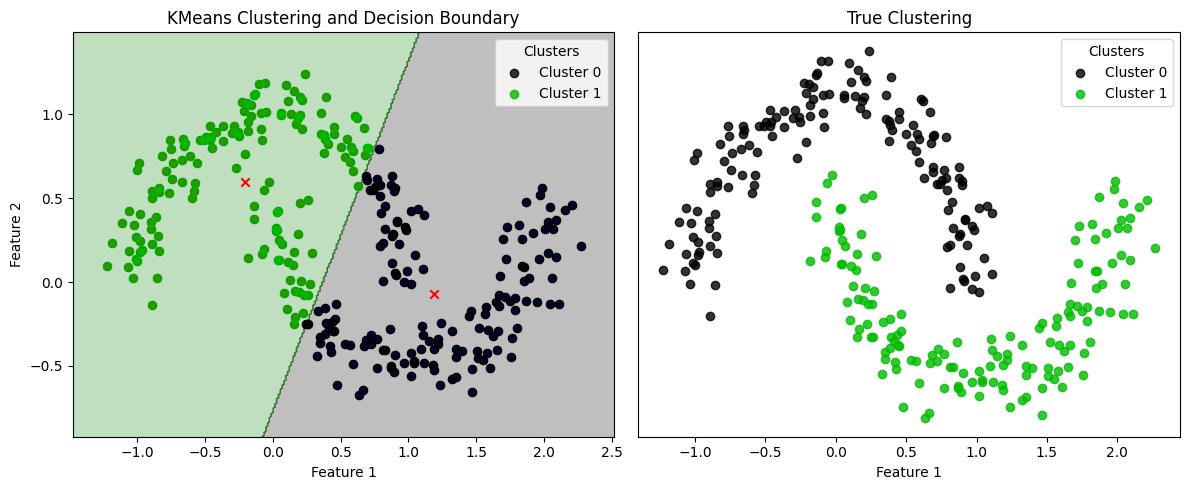

In [38]:
from sklearn.datasets import make_moons
from utils.helpers import plot_decision_boundary
from matplotlib.colors import ListedColormap

X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

kmeans = KMeansFromTemu(n_clusters=2)
y_pred = kmeans.fit_predict(X)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 5))

plot_decision_boundary(kmeans, X, y_pred, ax=ax1, label_points=False, cmap=ListedColormap(["black", "green"]))
visualize_clustering(X, y_pred, centroids=kmeans._centroids, ax=ax1, title="KMeans Clustering and Decision Boundary")
visualize_clustering(X, y, ax=ax2, title="True Clustering", yvisible=False)

plt.tight_layout()
plt.show()
